In [57]:
#importing packages
import pandas as pd
import numpy as np
import requests
import json

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [58]:
#starting with the task
aon = pd.read_csv("AON.csv")
aon["Date"] = pd.to_datetime(aon["Date"])
cpt = pd.read_csv("CPT.csv")
cpt["Date"] = pd.to_datetime(cpt["Date"])
gpn = pd.read_csv("GPN.csv")
gpn["Date"] = pd.to_datetime(gpn["Date"])
wtw = pd.read_csv("WTW.csv")
wtw["Date"] = pd.to_datetime(wtw["Date"])
aon

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,144.089996,141.820007,142.559998,141.889999,971800.0,135.293777
1,2017-11-14,143.770004,141.429993,141.740005,143.539993,799200.0,136.867050
2,2017-11-15,143.990005,142.550003,143.289993,142.830002,963900.0,136.190094
3,2017-11-16,143.589996,141.220001,143.160004,141.279999,1026900.0,134.712128
4,2017-11-17,141.490005,140.089996,140.779999,141.179993,912100.0,134.616745
...,...,...,...,...,...,...,...
1254,2022-11-07,288.290009,278.730011,281.769989,287.100006,595300.0,287.100006
1255,2022-11-08,289.149994,282.540009,287.540009,286.779999,776000.0,286.779999
1256,2022-11-09,287.350006,280.820007,286.260010,281.100006,680200.0,281.100006
1257,2022-11-10,296.420013,288.179993,290.000000,296.380005,998100.0,296.380005


In [59]:
#Do any have equal Close and Adj Close?
do_columns_equal = []
do_columns_equal.append(aon["Close"].equals(aon["Adj Close"]))
do_columns_equal.append(cpt["Close"].equals(cpt["Adj Close"]))
do_columns_equal.append(gpn["Close"].equals(gpn["Adj Close"]))
do_columns_equal.append(wtw["Close"].equals(wtw["Adj Close"]))
print(do_columns_equal)

[False, False, False, True]


In [60]:
#We can clearly see that wtw company has same Close and Adj Close price column but I have no clue what does it really mean

In [61]:
#Max min AON
max_min_aon = [aon["Adj Close"].max(),aon["Adj Close"].min()]
print(f"max for aon is {max_min_aon[0]} minimum is {max_min_aon[1]}")
#Max min CPT
max_min_cpt = [cpt["Adj Close"].max(),cpt["Adj Close"].min()]
print(f"max for cpt is {max_min_cpt[0]} minimum is {max_min_cpt[1]}")
#Max min GPN
max_min_gpn = [gpn["Adj Close"].max(),gpn["Adj Close"].min()]
print(f"max for gpn is {max_min_gpn[0]} minimum is {max_min_gpn[1]}")
#Max min WTW
max_min_wtw = [wtw["Adj Close"].max(),wtw["Adj Close"].min()]
print(f"max for wtw is {max_min_wtw[0]} minimum is {max_min_wtw[1]}")


max for aon is 331.7418518066406 minimum is 125.37725067138672
max for cpt is 175.0821990966797 minimum is 62.04124069213867
max for gpn is 218.26885986328125 minimum is 94.3243179321289
max for wtw is 270.07000732421875 minimum is 134.83999633789062


In [62]:
aon["Company"] = "aon"
cpt["Company"] = "cpt"
gpn["Company"] = "gpn"
wtw["Company"] = "wtw"
aon

,Date,High,Low,Open,Close,Volume,Adj Close,Company
0,2017-11-13,144.089996,141.820007,142.559998,141.889999,971800.0,135.293777,aon
1,2017-11-14,143.770004,141.429993,141.740005,143.539993,799200.0,136.867050,aon
2,2017-11-15,143.990005,142.550003,143.289993,142.830002,963900.0,136.190094,aon
3,2017-11-16,143.589996,141.220001,143.160004,141.279999,1026900.0,134.712128,aon
4,2017-11-17,141.490005,140.089996,140.779999,141.179993,912100.0,134.616745,aon
...,...,...,...,...,...,...,...,...
1254,2022-11-07,288.290009,278.730011,281.769989,287.100006,595300.0,287.100006,aon
1255,2022-11-08,289.149994,282.540009,287.540009,286.779999,776000.0,286.779999,aon
1256,2022-11-09,287.350006,280.820007,286.260010,281.100006,680200.0,281.100006,aon
1257,2022-11-10,296.420013,288.179993,290.000000,296.380005,998100.0,296.380005,aon


In [63]:
#I do not know what is logarithmic returns of adjusted close
full_dataframe = pd.concat([aon,cpt,gpn,wtw])
full_dataframe

,Date,High,Low,Open,Close,Volume,Adj Close,Company
0,2017-11-13,144.089996,141.820007,142.559998,141.889999,971800.0,135.293777,aon
1,2017-11-14,143.770004,141.429993,141.740005,143.539993,799200.0,136.867050,aon
2,2017-11-15,143.990005,142.550003,143.289993,142.830002,963900.0,136.190094,aon
3,2017-11-16,143.589996,141.220001,143.160004,141.279999,1026900.0,134.712128,aon
4,2017-11-17,141.490005,140.089996,140.779999,141.179993,912100.0,134.616745,aon
...,...,...,...,...,...,...,...,...
1253,2022-11-04,222.000000,217.000000,220.330002,221.210007,427500.0,221.210007,wtw
1254,2022-11-07,225.619995,220.419998,222.000000,224.690002,511700.0,224.690002,wtw
1255,2022-11-08,227.789993,223.279999,224.839996,225.690002,420500.0,225.690002,wtw
1256,2022-11-10,232.490005,228.770004,230.470001,232.119995,488200.0,232.119995,wtw


In [64]:
full_dataframe.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Company      0
dtype: int64

In [65]:

full_dataframe["Returns_log"] = np.log(full_dataframe["Adj Close"] - full_dataframe["Open"])
full_dataframe["Returns_log"] = full_dataframe["Returns_log"].fillna(0)
full_dataframe
full_dataframe = full_dataframe.set_index("Date")
full_dataframe



C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,High,Low,Open,Close,Volume,Adj Close,Company,Returns_log
Date,,,,,,,,
2017-11-13,144.089996,141.820007,142.559998,141.889999,971800.0,135.293777,aon,0.000000
2017-11-14,143.770004,141.429993,141.740005,143.539993,799200.0,136.867050,aon,0.000000
2017-11-15,143.990005,142.550003,143.289993,142.830002,963900.0,136.190094,aon,0.000000
2017-11-16,143.589996,141.220001,143.160004,141.279999,1026900.0,134.712128,aon,0.000000
2017-11-17,141.490005,140.089996,140.779999,141.179993,912100.0,134.616745,aon,0.000000
...,...,...,...,...,...,...,...,...
2022-11-04,222.000000,217.000000,220.330002,221.210007,427500.0,221.210007,wtw,-0.127828
2022-11-07,225.619995,220.419998,222.000000,224.690002,511700.0,224.690002,wtw,0.989542
2022-11-08,227.789993,223.279999,224.839996,225.690002,420500.0,225.690002,wtw,-0.162512


In [66]:
full_dataframe["Returns"] = full_dataframe["Adj Close"] - full_dataframe["Open"]
full_dataframe
#highest returns company
print(full_dataframe[full_dataframe.Returns == full_dataframe.Returns.max()]["Company"])

Date
2020-03-24    gpn
Name: Company, dtype: object


In [67]:
#lowest returns company
print(full_dataframe[full_dataframe.Returns == full_dataframe.Returns.min()]["Company"])

Date
2022-04-29    aon
Name: Company, dtype: object


In [68]:
full_dataframe[["Company","Returns_log"]].groupby("Company").agg("min","max")

,Returns_log
Company,
aon,-7.261713
cpt,-3.001486
gpn,-inf
wtw,-inf


In [69]:
full_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2017-11-13 to 2022-11-11
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   High         5034 non-null   float64
 1   Low          5034 non-null   float64
 2   Open         5034 non-null   float64
 3   Close        5034 non-null   float64
 4   Volume       5034 non-null   float64
 5   Adj Close    5034 non-null   float64
 6   Company      5034 non-null   object 
 7   Returns_log  5034 non-null   float64
 8   Returns      5034 non-null   float64
dtypes: float64(8), object(1)
memory usage: 393.3+ KB


In [71]:
full_dataframe.resample('D').interpolate()[::7]

C:\Users\tomas\AppData\Local\Temp\ipykernel_13012\2834396487.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  full_dataframe.resample('D').interpolate()[::7]


ValueError: cannot reindex on an axis with duplicate labels

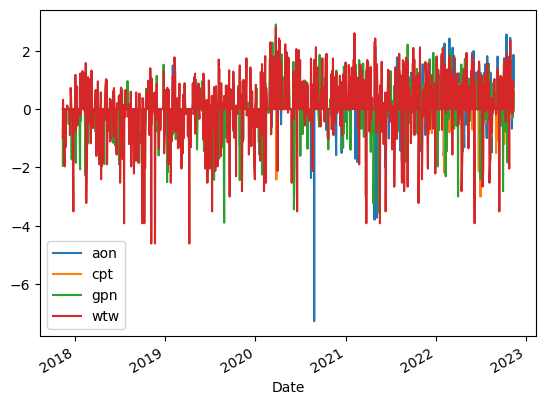

In [77]:
full_dataframe[full_dataframe["Company"] == "aon"]["Returns_log"].plot()
full_dataframe[full_dataframe["Company"] == "cpt"]["Returns_log"].plot()
full_dataframe[full_dataframe["Company"] == "gpn"]["Returns_log"].plot()
full_dataframe[full_dataframe["Company"] == "wtw"]["Returns_log"].plot()
plt.legend(["aon","cpt","gpn","wtw"])
plt.show()

ValueError: supplied range of [-inf, 2.8966673423030507] is not finite

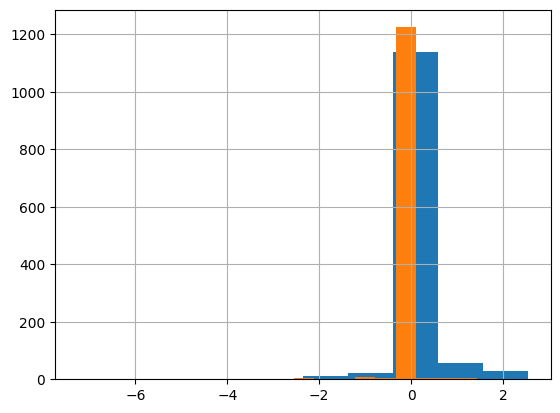

In [78]:
#It does not work because I did not know what is log returns so I have infinity values there
full_dataframe[full_dataframe["Company"] == "aon"]["Returns_log"].hist()
full_dataframe[full_dataframe["Company"] == "cpt"]["Returns_log"].hist()
full_dataframe[full_dataframe["Company"] == "gpn"]["Returns_log"].hist()
full_dataframe[full_dataframe["Company"] == "wtw"]["Returns_log"].hist()
plt.legend(["aon","cpt","gpn","wtw"])
plt.show()

In [79]:
#Problem 2
sp = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
sp

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


In [80]:
#All companies uniqe
sp["Symbol"].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
498    False
499    False
500    False
501    False
502    False
Name: Symbol, Length: 503, dtype: bool

In [82]:
#45 companies did not fill it in
sp.included.isna().sum()

45

In [88]:
clean_dataset = sp[~sp.included.isna()]
clean_dataset
clean_dataset.included.isna().sum()

0

In [89]:
clean_dataset

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


In [91]:
clean_dataset["included"] = pd.to_datetime(clean_dataset["included"], dayfirst=True,errors='coerce')
clean_dataset

C:\Users\tomas\AppData\Local\Temp\ipykernel_13012\2947437894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataset["included"] = pd.to_datetime(clean_dataset["included"], dayfirst=True,errors='coerce')


,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997-10-06,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",2019-12-23,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",2001-08-07,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",2001-06-22,1873


In [97]:
#Youngest
clean_dataset[clean_dataset["included"] == clean_dataset["included"].max()]


,Symbol,Security,GICS Sector,hq,included,Founded
48,ACGL,Arch Capital Group,Financials,"Hamilton, Bermuda",2022-11-01,1995


In [103]:
#Oldest
age_dataset_old = clean_dataset[clean_dataset["included"] == clean_dataset["included"].min()]
age_dataset_old["Founded"] = age_dataset_old["Founded"].astype(int)
age_dataset_old.info()
age_dataset_old["age"] = 2023 - age_dataset_old["Founded"]


ValueError: invalid literal for int() with base 10: '1881/1894 (1980)'

<AxesSubplot:ylabel='GICS\xa0Sector'>

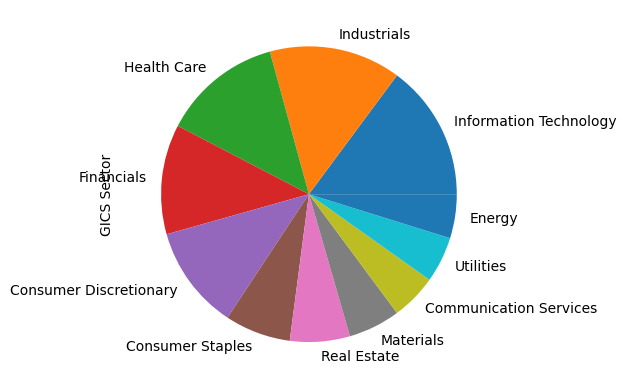

In [114]:

number_of_companies = clean_dataset["GICS\xa0Sector"].value_counts()
number_of_companies.plot(kind="pie")